In [108]:
import pandas as pd
import geopandas
import contextily as cx 
import matplotlib.pyplot as plt

In [109]:
gp_surgery_locations = pd.read_csv('data/data_mini_project_1/gp_surgery_locations.csv')

In [110]:
gp_surgery_locations

Unnamed: 0 gp_code                             name  \
0               0  A81001              THE DENSHAM SURGERY   
1               1  A81002       QUEENS PARK MEDICAL CENTRE   
2               2  A81004            ACKLAM MEDICAL CENTRE   
3               3  A81005               SPRINGWOOD SURGERY   
4               4  A81006  TENNANT STREET MEDICAL PRACTICE   
...           ...     ...                              ...   
12463       12463  Y08137         BROMLEY HOSPITAL AT HOME   
12464       12464  Y08138                       VTE CLINIC   
12465       12465  Y08139     ALDERSHOT URGENT CARE CENTRE   
12466       12466  Y08140              ENT CASUALTY CLINIC   
12467       12467  Y08141       LPT MENTAL HEALTH FORENSIC   

                      address_1  postcode  valid_from  valid_to     query  \
0             THE HEALTH CENTRE  TS18 1HU    19740401       NaN  TS18 1HU   
1       QUEENS PARK MEDICAL CTR  TS18 2AW    19740401       NaN  TS18 2AW   
2                TRIMDON AVENUE   TS5 8SB    19740401       NaN   TS5 8SB   
3            SPRINGWOOD SURGERY  TS14 7DJ    19740401       NaN  TS14 7DJ   
4      TENNANT ST MEDICAL PRACT  TS18 2AT    19740401       NaN  TS18 2AT   
...                         ...       ...         ...       ...       ...   
12463             CENTRAL COURT   BR6 0JA    20230901       NaN   BR6 0JA   
12464                      RAEI   WN1 2NN    20231026       NaN   WN1 2NN   
12465  ALDERSHOT CTR FOR HEALTH  GU11 1AY    20231204       NaN  GU11 1AY   
12466  ENT TREATMENT ROOM, RAEI   WN1 2NN    20231112       NaN   WN1 2NN   
12467         BRIDGE PARK PLAZA   LE4 8PQ    20231020       NaN   LE4 8PQ   

      result_postcode  result_quality  ...  \
0            TS18 1HU             1.0  ...   
1            TS18 2AW             1.0  ...   
2             TS5 8SB             1.0  ...   
3            TS14 7DJ             1.0  ...   
4            TS18 2AT             1.0  ...   
...               ...             ...  ...   
12463         BR6 0JA             1.0  ...   
12464         WN1 2NN             1.0  ...   
12465        GU11 1AY             1.0  ...   
12466         WN1 2NN             1.0  ...   
12467         LE4 8PQ             1.0  ...   

       result_codes_parliamentary_constituency  result_codes_ccg  \
0                                    E14000970         E38000247   
1                                    E14000970         E38000247   
2                                    E14000819         E38000247   
3                                    E14000820         E38000247   
4                                    E14000970         E38000247   
...                                        ...               ...   
12463                                E14000872         E38000244   
12464                                E14001039         E38000205   
12465                                E14000530         E38000252   
12466                                E14001039         E38000205   
12467                                E14000625         E38000201   

      result_codes_ccg_id result_codes_ced  result_codes_nuts  \
0                     16C        E99999999              TLC11   
1                     16C        E99999999              TLC11   
2                     16C        E99999999              TLC12   
3                     16C        E99999999              TLC12   
4                     16C        E99999999              TLC11   
...                   ...              ...                ...   
12463                 72Q        E99999999              TLI61   
12464                 02H        E99999999              TLD36   
12465               D4U1Y        E58000525              TLJ37   
12466                 02H        E99999999              TLD36   
12467                 04V        E58000883              TLF22   

       result_codes_lsoa result_codes_msoa result_codes_lau2 result_codes_pfa  \
0              E01033477         E02002548         E06000004        E23000013   
1              E01012267

In [111]:
gp_surgery_locations_gdf = geopandas.GeoDataFrame(
    gp_surgery_locations, 
    geometry=geopandas.points_from_xy(
        gp_surgery_locations.result_eastings, 
        gp_surgery_locations.result_northings
        ), 
    crs="EPSG:27700"
)



<AxesSubplot: >

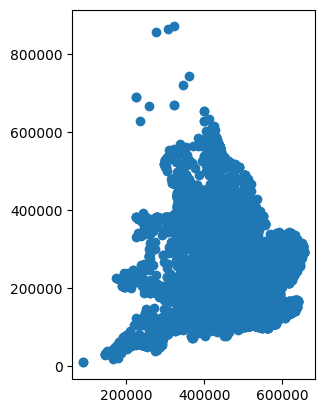

In [112]:
gp_surgery_locations_gdf.plot()

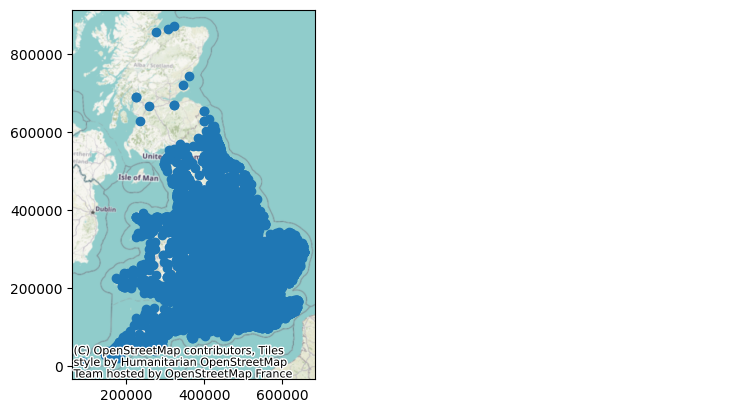

In [113]:
ax = gp_surgery_locations_gdf.plot()
cx.add_basemap(ax, crs=gp_surgery_locations_gdf.crs.to_string(), zoom=6)

Let's tidy this map up a bit as it's not the neatest at the moment. 

We want to
- remove the axis labels and tickmarks (the numbers up the side and along the bottom, and the little lines indicating where they are on the axis)
- make the points smaller
- make the points transparent, so we can see points that are very close to each other better
- make the map bigger
- add a title

Don't forget that you can refer back to the geopandas .plot() documentation too ([Link - will open in new tab](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html))

Text(0.5, 1.0, 'GP Surgeries in the UK')

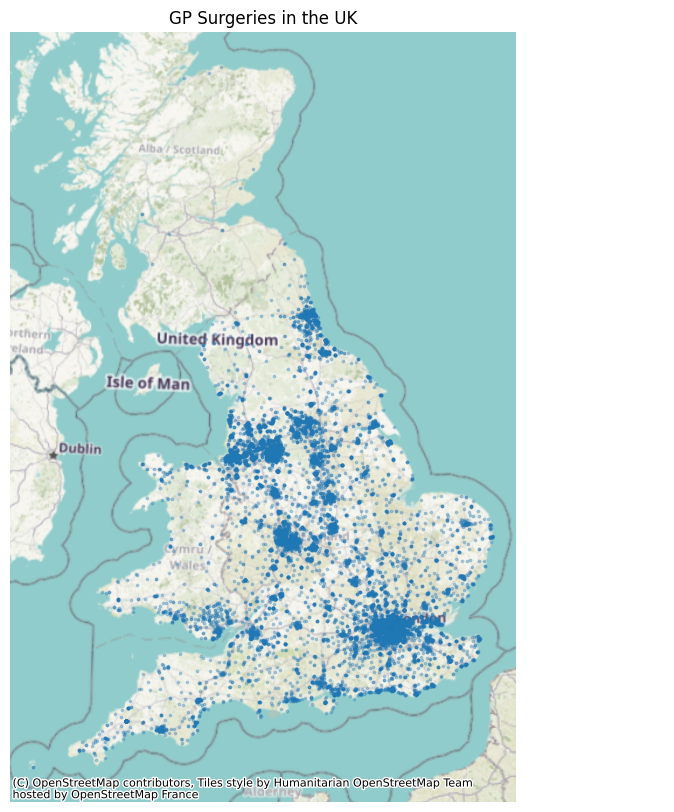

In [114]:
ax = gp_surgery_locations_gdf.plot(
    alpha=0.3, # Set the opacity
    figsize=(15, 10), # Set the figure size
    markersize = 3 # Set the marker size
    )
cx.add_basemap(ax, crs=gp_surgery_locations_gdf.crs.to_string(), zoom=6)

# Find a way to remove the axis labels. You might want to use google for this!
# There are a few different ways you can go about it.
ax.axis('off')

# Add a title
plt.title("GP Surgeries in the UK")

Now let's add in some interesting additional data about these GP surgeries. 

We can use 

In [115]:
# First, load in the two datasets
gp_surgery_populations_female = pd.read_csv('data/data_mini_project_1/gp-reg-pat-prac-sing-age-female.csv')
gp_surgery_populations_male = pd.read_csv('data/data_mini_project_1/gp-reg-pat-prac-sing-age-male.csv')

In [116]:
# Join the two datasets together
gp_surgery_populations_all = pd.concat([gp_surgery_populations_female, gp_surgery_populations_male], 
          ignore_index=True)

Let's take a look at the unique values present in the key columns.

In [117]:
gp_surgery_populations_all.SEX.unique()

array(['FEMALE', 'MALE'], dtype=object)

In [118]:
gp_surgery_populations_all.AGE.unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95+', 'ALL'], dtype=object)

Importantly, there's an 'all' category for the ages! So we need to be careful when aggregating - we couldn't just group our data by gender and sum, for example. 

However, this does have the benefit of meaning we can just pull out any rows where the age is 'all' for the next section. 

In [119]:
gp_surgery_pop_all_ages = gp_surgery_populations_all[gp_surgery_populations_all['AGE']=='ALL']
# gp_surgery_populations_all[gp_surgery_populations_all[_____]==______]

# gp_surgery_pop_all_ages.____(_____)
gp_surgery_pop_all_ages.head(30)

EXTRACT_DATE SUB_ICB_LOCATION_CODE ONS_SUB_ICB_LOCATION_CODE ORG_CODE  \
96      01Nov2023                   00L                 E38000130   A84002   
193     01Nov2023                   00L                 E38000130   A84005   
290     01Nov2023                   00L                 E38000130   A84006   
387     01Nov2023                   00L                 E38000130   A84007   
484     01Nov2023                   00L                 E38000130   A84008   
581     01Nov2023                   00L                 E38000130   A84009   
678     01Nov2023                   00L                 E38000130   A84011   
775     01Nov2023                   00L                 E38000130   A84013   
872     01Nov2023                   00L                 E38000130   A84014   
969     01Nov2023                   00L                 E38000130   A84016   
1066    01Nov2023                   00L                 E38000130   A84018   
1163    01Nov2023                   00L                 E38000130   A84020   
1260    01Nov2023                   00L                 E38000130   A84022   
1357    01Nov2023                   00L                 E38000130   A84024   
1454    01Nov2023                   00L                 E38000130   A84025   
1551    01Nov2023                   00L                 E38000130   A84026   
1648    01Nov2023                   00L                 E38000130   A84027   
1745    01Nov2023                   00L                 E38000130   A84028   
1842    01Nov2023                   00L                 E38000130   A84029   
1939    01Nov2023                   00L                 E38000130   A84030   
2036    01Nov2023                   00L                 E38000130   A84031   
2133    01Nov2023                   00L                 E38000130   A84033   
2230    01Nov2023                   00L                 E38000130   A84034   
2327    01Nov2023                   00L                 E38000130   A84035   
2424    01Nov2023                   00L                 E38000130   A84036   
2521    01Nov2023                   00L                 E38000130   A84037   
2618    01Nov2023                   00L                 E38000130   A84038   
2715    01Nov2023                   00L                 E38000130   A84039   
2812    01Nov2023                   00L                 E38000130   A84040   
2909    01Nov2023                   00L                 E38000130   A84042   

      POSTCODE     SEX  AGE  NUMBER_OF_PATIENTS  
96    NE65 7UW  FEMALE  ALL                3111  
193   NE22 6JX  FEMALE  ALL                6403  
290   NE66 2NL  FEMALE  ALL                9694  
387   NE20 9SD  FEMALE  ALL                5476  
484   NE70 7ER  FEMALE  ALL                2309  
581   NE24 1HD  FEMALE  ALL               13598  
678   NE20 9SD  FEMALE  ALL                4244  
775   NE22 7DU  FEMALE  ALL                3224  
872   NE24 1DX  FEMALE  ALL                6685  
969   NE42 5PW  FEMALE  ALL                3566  
1066  NE45 5LG  FEMALE  ALL                3763  
1163  NE62 5RA  FEMALE  ALL                4026  
1260  NE65 9SF  FEMALE  ALL                6181  
1357  NE46 1QJ  FEMALE  ALL                5319  
1454  NE23 6QN  FEMALE  ALL                2542  
1551  TD15 1LL  FEMALE  ALL                4481  
1648  NE48 2HE  FEMALE  ALL                1727  
1745  NE63 0NG  FEMALE  ALL                9581  
1842  NE61 5LX  FEMALE  ALL                2248  
1939  NE23 6US  FEMALE  ALL                5376  
2036  NE61 1JX  FEMALE  ALL                5359  
2133  NE46 1QJ  FEMALE  ALL                2912  
2230  NE49 9AP  FEMALE  ALL                2796  
2327  NE42 5DQ  FEMALE  ALL                3032  
2424  NE61 1BJ  FEMALE  ALL               26102  
2521  NE23 7EF  FEMALE  ALL                3011  
2618  NE23 6QN  FEMALE  ALL                4264  
2715  NE61 1JX  FEMALE  ALL                3443  
2812  NE46 4BU  FEMALE  ALL                1763  
2909  NE61 4EG  FEMALE  ALL                1025

For now, we're just interested in the totals per surgery - not split by gender, as they currently are.

All we need is a dataframe with the following columns:
GP Surgery Code
GP Surgery Population

So how can we get to that?

We can use the groupby() method, telling it what column we want to do the grouping by. 

Then we want to tell it what column we are interested in doing the calculation on.

Next, we can tell it what transformation we want it to apply to the data in that column - this could be mean, median, sum, etc. so think about what we want to work out in this case. 

Finally, to make it easier to join it back to our other dataframe, we reset the index. 
This sounds a bit strange, but it just ensures that 'ORG_CODE' is a normal column and our index - which you can think of as our row numbers - is numbered from 0 to the total number of GP surgeries, rather than our row numbers being the GP surgery code instead. Sometimes we might want this, so it's useful to know about both options!

In [120]:
# gp_surgery_pop_total = gp_surgery_pop_all_ages.____('ORG_CODE')['NUMBER_OF_PATIENTS'].___().reset_index(drop=____)
gp_surgery_pop_total = gp_surgery_pop_all_ages.groupby('ORG_CODE')['NUMBER_OF_PATIENTS'].sum().reset_index(drop=False)

gp_surgery_pop_total

ORG_CODE  NUMBER_OF_PATIENTS
0      A81001                3898
1      A81002               18481
2      A81004               11303
3      A81005                7959
4      A81006               14400
...       ...                 ...
6331   Y07060               25684
6332   Y07274                1662
6333   Y07275                2937
6334   Y07377                 215
6335   Y07697                  77

[6336 rows x 2 columns]

In [121]:
# Now let's join this to our geodataframe

gp_surgery_locations_gdf = gp_surgery_locations_gdf.merge(
    gp_surgery_pop_total, 
    left_on="gp_code", 
    right_on="ORG_CODE"
    )

In [122]:
gp_surgery_locations_gdf

Unnamed: 0 gp_code                               name  \
0              0  A81001                THE DENSHAM SURGERY   
1              1  A81002         QUEENS PARK MEDICAL CENTRE   
2              2  A81004              ACKLAM MEDICAL CENTRE   
3              3  A81005                 SPRINGWOOD SURGERY   
4              4  A81006    TENNANT STREET MEDICAL PRACTICE   
...          ...     ...                                ...   
6331       11392  Y07060  THOMAS WALKER WESTGATE HEALTHCARE   
6332       11602  Y07274          ST NICOLAS MEDICAL CENTRE   
6333       11603  Y07275         BROUGHTON HOUSE GP SURGERY   
6334       11705  Y07377   THE YORKSHIRE GATEWAY - BEVAN HC   
6335       12023  Y07697  WIGAN BOROUGH SPECIALIST SERVICES   

                      address_1  postcode  valid_from  valid_to     query  \
0             THE HEALTH CENTRE  TS18 1HU    19740401       NaN  TS18 1HU   
1       QUEENS PARK MEDICAL CTR  TS18 2AW    19740401       NaN  TS18 2AW   
2                TRIMDON AVENUE   TS5 8SB    19740401       NaN   TS5 8SB   
3            SPRINGWOOD SURGERY  TS14 7DJ    19740401       NaN  TS14 7DJ   
4      TENNANT ST MEDICAL PRACT  TS18 2AT    19740401       NaN  TS18 2AT   
...                         ...       ...         ...       ...       ...   
6331      THOMAS WALKER SURGERY   PE1 2QP    20210901       NaN   PE1 2QP   
6332          WINDERMERE AVENUE  CV11 6HH    20220401       NaN  CV11 6HH   
6333                 20 NEW WAY  WF17 5QT    20220401       NaN  WF17 5QT   
6334  BEVAN HEALTHCR, BEVAN HSE   BD1 3LS    20220801       NaN   BD1 3LS   
6335      WIGAN GP ALLIANCE LLP   WN3 6PR    20220901       NaN   WN3 6PR   

     result_postcode  result_quality  ...  result_codes_ced  \
0           TS18 1HU             1.0  ...         E99999999   
1           TS18 2AW             1.0  ...         E99999999   
2            TS5 8SB             1.0  ...         E99999999   
3           TS14 7DJ             1.0  ...         E99999999   
4           TS18 2AT             1.0  ...         E99999999   
...              ...             ...  ...               ...   
6331         PE1 2QP             1.0  ...         E99999999   
6332        CV11 6HH             1.0  ...         E58001596   
6333        WF17 5QT             1.0  ...         E99999999   
6334         BD1 3LS             1.0  ...         E99999999   
6335         WN3 6PR             1.0  ...         E99999999   

      result_codes_nuts result_codes_lsoa result_codes_msoa  \
0                 TLC11         E01033477         E02002548   
1                 TLC11         E01012267         E02002548   
2                 TLC12         E01012024         E02002510   
3                 TLC12         E01012117         E02002532   
4                 TLC11         E01012267         E02002548   
...                 ...               ...               ...   
6331              TLH11         E01015655         E02003250   
6332              TLG13         E01031104         E02006477   
6333              TLE44         E01011029         E02002280   
6334              TLE41         E01033690         E02002221   
6335              TLD36         E01006404         E02001301   

      result_codes_lau2  result_codes_pfa result  \
0             E06000004         E23000013    NaN   
1             E06000004         E23000013    NaN   
2             E06000002         E23000013    NaN   
3             E06000003         E23000013    NaN   
4             E06000004         E23000013    NaN   
...                 ...               ...    ...   
6331          E06000031         E23000023    NaN   
6332          E07000219         E23000017    NaN   
6333          E08000034         E23000010    NaN   
6334          E08000032         E23000010    NaN   
6335          E08000010         E23000005    NaN   

                           geometry ORG_CODE NUMBER_OF_PATIENTS  
0     POINT (444136.000 518701.000)   A81001               3898  
1     POINT (444458.000 519543.000)   A81002         

Let's take our code from earlier 

Text(0.5, 1.0, 'GP Surgeries in the UK')

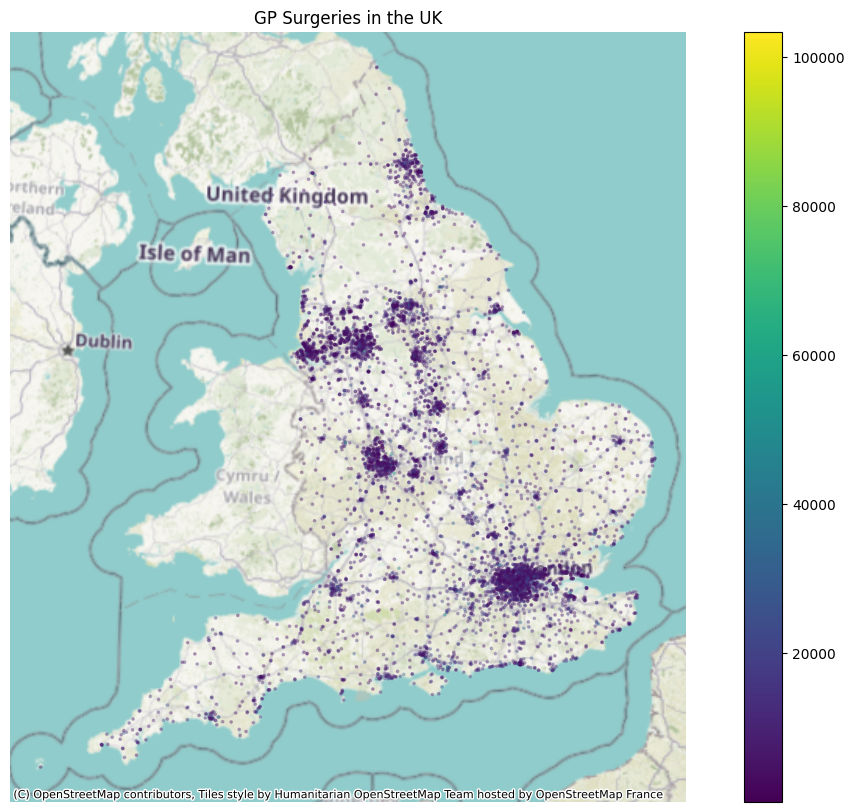

In [123]:
ax = gp_surgery_locations_gdf.plot(
    "NUMBER_OF_PATIENTS",
    legend=True,
    alpha=0.3, # Set the opacity
    figsize=(15, 10), # Set the figure size
    markersize = 3 # Set the marker size
    )
cx.add_basemap(ax, crs=gp_surgery_locations_gdf.crs.to_string(), zoom=6)

# Find a way to remove the axis labels. You might want to use google for this!
# There are a few different ways you can go about it.
ax.axis('off')

# Add a title
plt.title("GP Surgeries in the UK")

Hmm - that doesn't feel like it tells us very much. And why is there so much variation?

Let's take a look at the distribution of the NUMBER_OF_PATIENTS column

<AxesSubplot: >

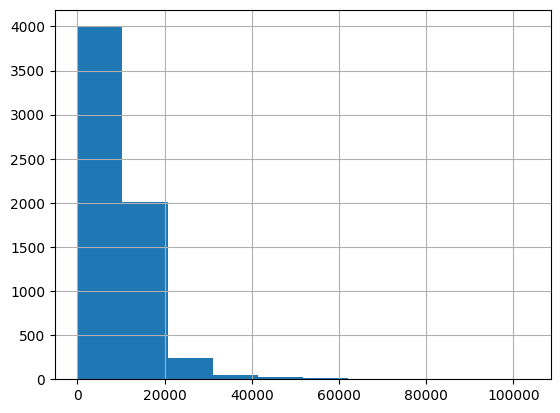

In [124]:
gp_surgery_locations_gdf['NUMBER_OF_PATIENTS'].hist()

This seems to suggest that most GP surgeries have fewer than 20,000 patients, but a handful have more than this.

Let's just visualise those with over 20,000 patients by filtering our dataframe. 

Text(0.5, 1.0, 'GP Surgeries in the UK')

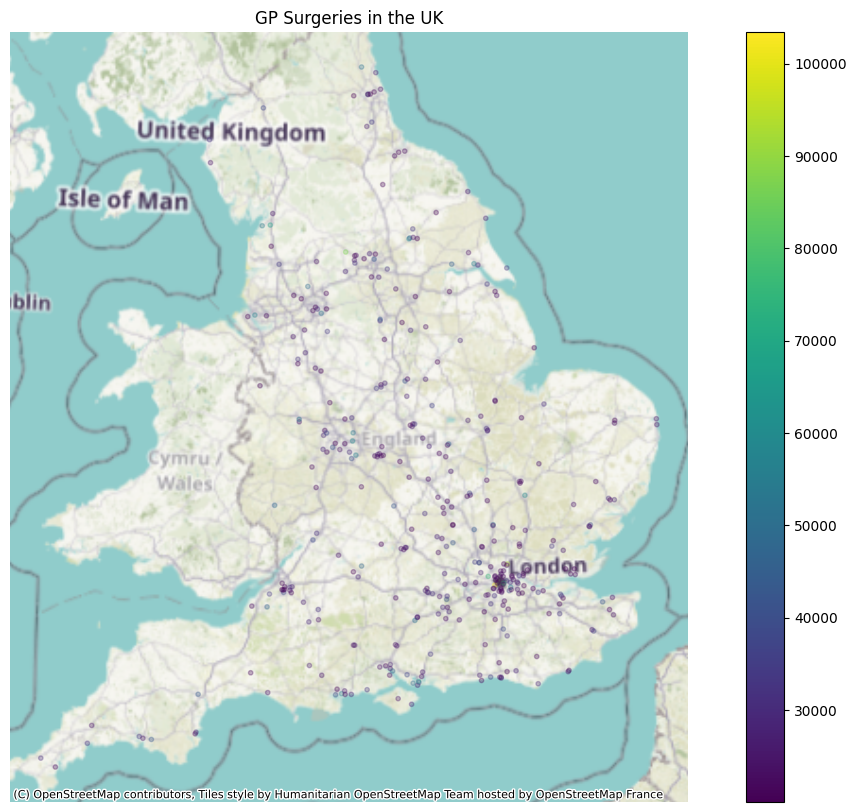

In [125]:
ax = gp_surgery_locations_gdf[gp_surgery_locations_gdf["NUMBER_OF_PATIENTS"]>20000].plot(
    "NUMBER_OF_PATIENTS",
    legend=True,
    alpha=0.3, # Set the opacity
    figsize=(15, 10), # Set the figure size
    markersize = 10
    )
cx.add_basemap(ax, crs=gp_surgery_locations_gdf.crs.to_string(), zoom=6)

# Find a way to remove the axis labels. You might want to use google for this!
# There are a few different ways you can go about it.
ax.axis('off')

# Add a title
plt.title("GP Surgeries in the UK")

Well, this still isn't very clear - but what about if we adjust the marker size by the number of patients?

Text(0.5, 1.0, 'GP Surgeries in the UK')

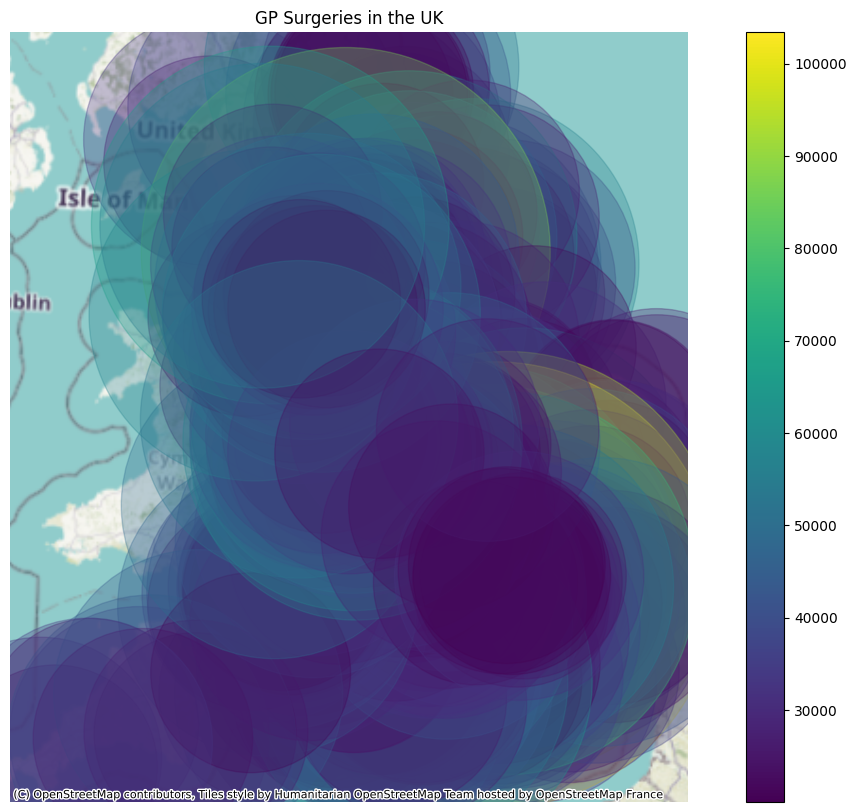

In [126]:
ax = gp_surgery_locations_gdf[gp_surgery_locations_gdf["NUMBER_OF_PATIENTS"]>20000].plot(
    "NUMBER_OF_PATIENTS",
    legend=True,
    alpha=0.3, # Set the opacity
    figsize=(15, 10), # Set the figure size
    markersize = "NUMBER_OF_PATIENTS"
    )
cx.add_basemap(ax, crs=gp_surgery_locations_gdf.crs.to_string(), zoom=6)

# Find a way to remove the axis labels. You might want to use google for this!
# There are a few different ways you can go about it.
ax.axis('off')

# Add a title
plt.title("GP Surgeries in the UK")

That's no good! We need to find a way of adjusting the size. 

We could write the maths for this ourselves, but an easier option is to import the MinMaxScaler function. 
This is actually part of the sklearn package, which is usually used for machine learning. Scaling of variables is a really important step for a lot of machine learning models, but in this case it will allow us to change the values of our marker size - which at the moment range from 20,000 to nearly 100,000 - to a scale that works better for matplotlib and the scale of our map. 

For example, if 100,000 is our max, we might say that we want that to be scaled down to 200. 
If 20,000 is our minimum, we might say that we want that - our smallest points - to be scaled down to 10. 

MinMaxScaler deals with the maths needed to make 

Text(0.5, 1.0, 'GP Surgeries in the UK with over 20,000 registered patients')

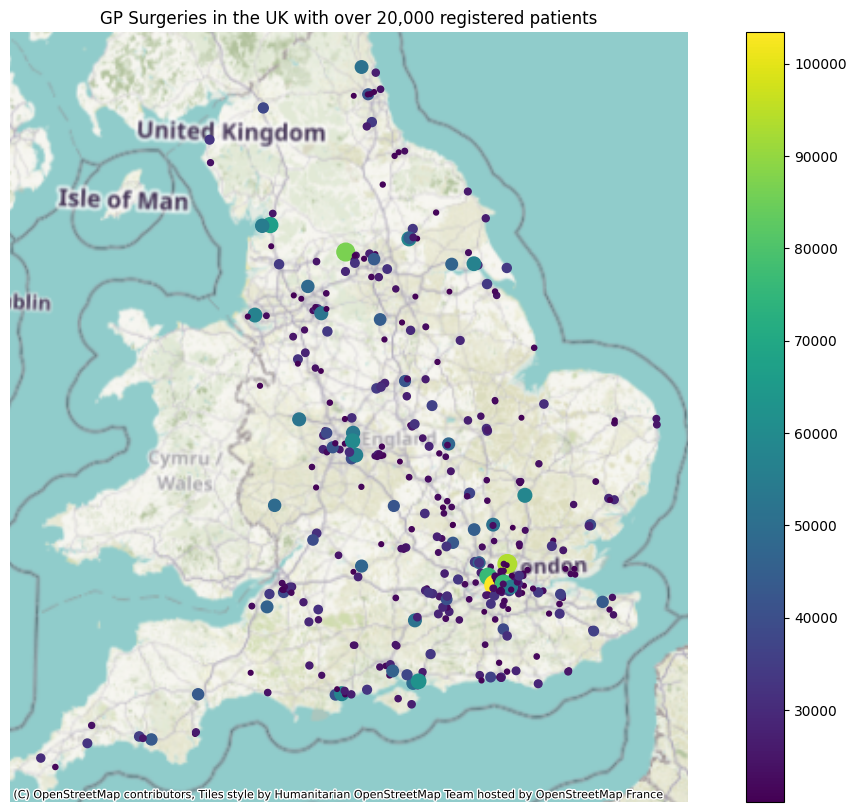

In [127]:
from sklearn import preprocessing

gp_surgery_locations_over_20000 = gp_surgery_locations_gdf[gp_surgery_locations_gdf["NUMBER_OF_PATIENTS"]>20000].copy()

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(10, 200))
gp_surgery_locations_over_20000[['marker_size']] = min_max_scaler.fit_transform(gp_surgery_locations_over_20000[["NUMBER_OF_PATIENTS"]])


ax = gp_surgery_locations_over_20000.plot(
    "NUMBER_OF_PATIENTS",
    legend=True,
    figsize=(15, 10), # Set the figure size
    markersize="marker_size"
    )
cx.add_basemap(ax, crs=gp_surgery_locations_gdf.crs.to_string(), zoom=6)

# Find a way to remove the axis labels. You might want to use google for this!
# There are a few different ways you can go about it.
ax.axis('off')

# Add a title
plt.title("GP Surgeries in the UK with over 20,000 registered patients")

There's still a lot here - so let's just cut it down to the top 20 and add their names and the number of people they serve. 

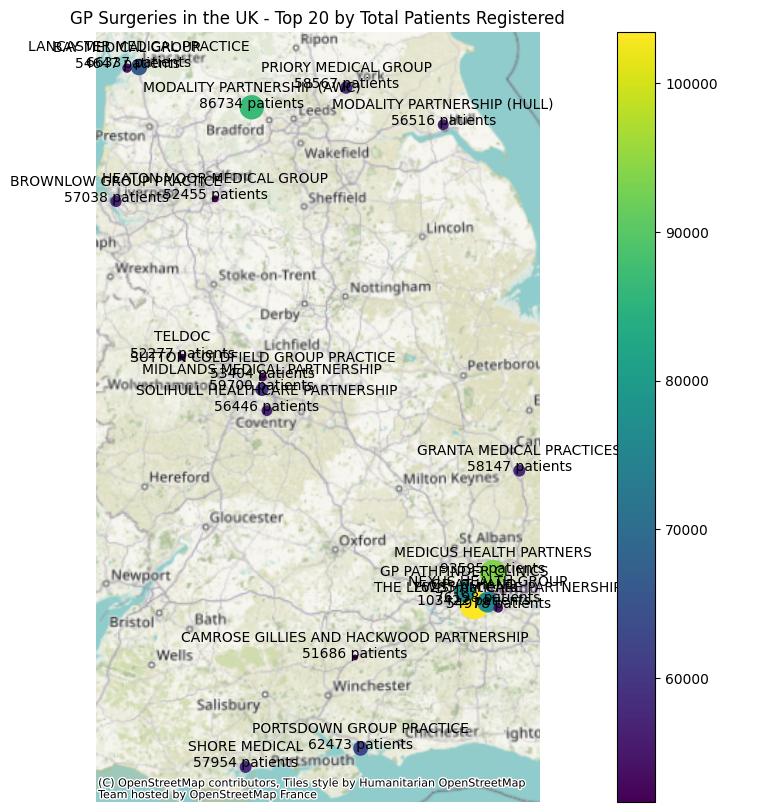

In [128]:
gp_surgery_locations_top_20 = (
    gp_surgery_locations_gdf
    .sort_values('NUMBER_OF_PATIENTS',ascending=False)
    .head(20)
)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(10, 400))

gp_surgery_locations_top_20[['marker_size']] = (
    min_max_scaler
    .fit_transform(gp_surgery_locations_top_20[["NUMBER_OF_PATIENTS"]])
)

fig, ax = plt.subplots(figsize=(20, 10))

gp_surgery_locations_top_20.plot(
    "NUMBER_OF_PATIENTS",
    legend=True,
    figsize=(15, 10), # Set the figure size
    markersize="marker_size",
    ax=ax
    )
cx.add_basemap(ax, crs=gp_surgery_locations_gdf.crs.to_string(), zoom=7)

# Find a way to remove the axis labels. You might want to use google for this!
# There are a few different ways you can go about it.
ax.axis('off')

# Add a title
plt.title("GP Surgeries in the UK - Top 20 by Total Patients Registered")

# Add labels
texts = [
    ax.text(x = gp_surgery_locations_top_20.iloc[i].geometry.centroid.coords[0][0], 
            y= gp_surgery_locations_top_20.iloc[i].geometry.centroid.coords[0][1],
            s=f"{gp_surgery_locations_top_20['name'].iloc[i]}\n{gp_surgery_locations_top_20['NUMBER_OF_PATIENTS'].iloc[i]} patients", 
            ha='center') 
            for i in range(len(gp_surgery_locations_top_20))]

We're nearly there - but those labels are a bit of a mess where there are lots of points close together. 

Is there something we can do about this, and can we zoom out to show the whole uk too? 

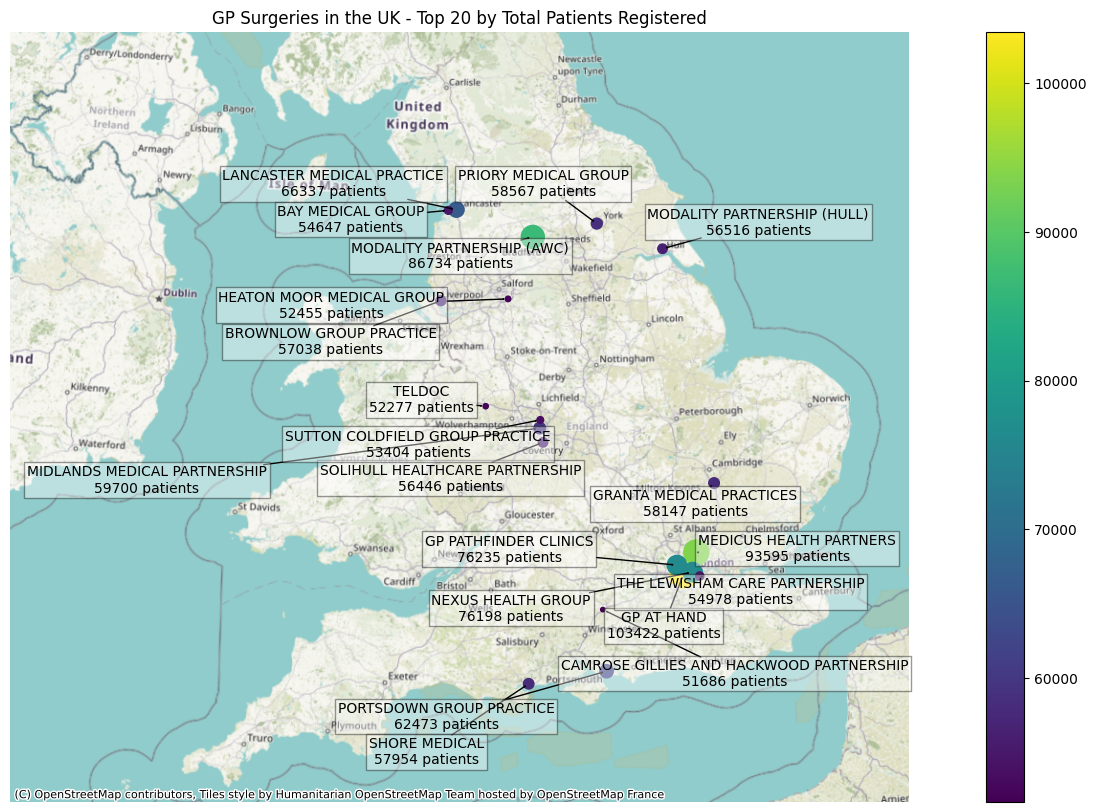

In [129]:
from adjustText import adjust_text

gp_surgery_locations_top_20 = (
    gp_surgery_locations_gdf
    .sort_values('NUMBER_OF_PATIENTS',ascending=False)
    .head(20)
)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(10, 400))
gp_surgery_locations_top_20[['marker_size']] = (
    min_max_scaler
    .fit_transform(gp_surgery_locations_top_20[["NUMBER_OF_PATIENTS"]])
)

fig, ax = plt.subplots(figsize=(20, 10))

gp_surgery_locations_top_20.plot(
    "NUMBER_OF_PATIENTS",
    legend=True,
    figsize=(15, 10), # Set the figure size
    markersize="marker_size",
    ax=ax
    )

ax.set_ylim([0, 600000])
ax.set_xlim([0, 700000])

cx.add_basemap(ax, crs=gp_surgery_locations_gdf.crs.to_string(), zoom=7)

# Find a way to remove the axis labels. You might want to use google for this!
# There are a few different ways you can go about it.
ax.axis('off')

# Add a title
plt.title("GP Surgeries in the UK - Top 20 by Total Patients Registered")

# Add labels

texts = [ax.text(
    x = gp_surgery_locations_top_20.iloc[i].geometry.centroid.coords[0][0], 
    y= gp_surgery_locations_top_20.iloc[i].geometry.centroid.coords[0][1],
    s=f"{gp_surgery_locations_top_20['name'].iloc[i]}\n{gp_surgery_locations_top_20['NUMBER_OF_PATIENTS'].iloc[i]} patients", 
    ha='center',
    bbox=dict(facecolor='white', edgecolor='black', pad=2, alpha=0.4)
    ) 
            for i in range(len(gp_surgery_locations_top_20))]


adjust_text(texts, 
    arrowprops=dict(arrowstyle="->", color='black', lw=1), 
    ax=ax
    )

## Bonus Exercise 1:

What can you do to this code to make the final map easier to read?

Use the documentation for matplotlib and the geopandas plot function, as well as google, to work out ways of doing some of the following things: 
- Formatting the number of patients so there is a comma after the thousands separator
- Adding a label to the legend (or maybe even get rid of the legend and the colour altogether - are they adding anything?)
- Changing the GP practice names from uppercase to title case (i.e. only the first letter of each work is capitalised) 
- Wrapping long GP practice names after a certain number of characters
- Adjust the size of the labels
- Increasing the level of text repelling
- Increasing the maximum time that the adjust_text function will spend trying to find good positions for the text labels
- Further adjusting the maximum extents of the graph (hint - temporarily comment out `ax.axis('off')` to better see what the current axis limits are)

If you are working in a group, you could try dividing up these tasks between different group members.

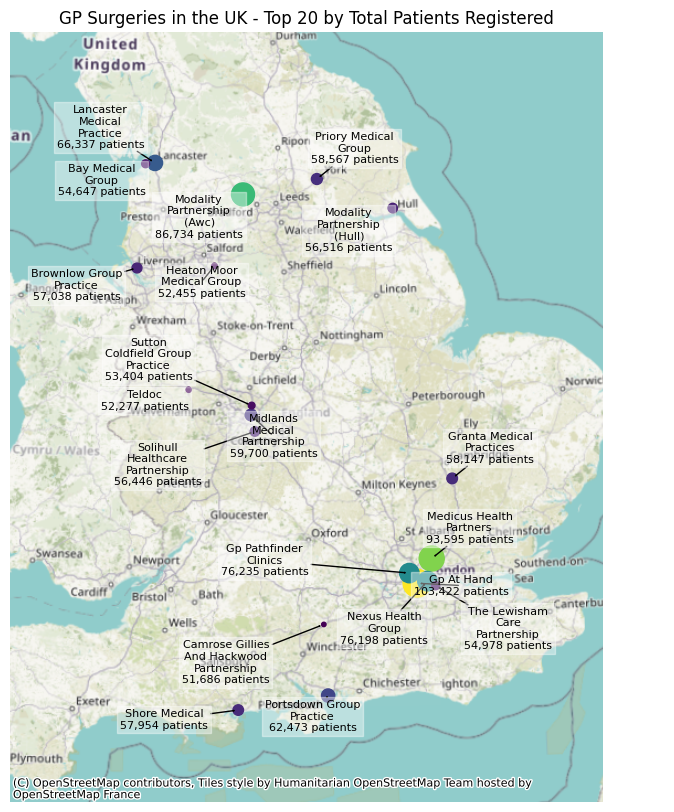

In [130]:
import textwrap

gp_surgery_locations_top_20 = (
    gp_surgery_locations_gdf
    .sort_values('NUMBER_OF_PATIENTS',ascending=False)
    .head(20)
)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(10, 400))
gp_surgery_locations_top_20[['marker_size']] = (
    min_max_scaler
    .fit_transform(gp_surgery_locations_top_20[["NUMBER_OF_PATIENTS"]])
)

fig, ax = plt.subplots(figsize=(20, 10))

gp_surgery_locations_top_20.plot(
    "NUMBER_OF_PATIENTS",
    legend=False,
    figsize=(15, 10), # Set the figure size
    markersize="marker_size",
    ax=ax
    )

ax.set_ylim([30000, 550000])
ax.set_xlim([250000, 650000])

cx.add_basemap(ax, crs=gp_surgery_locations_gdf.crs.to_string(), zoom=7)

# Find a way to remove the axis labels. You might want to use google for this!
# There are a few different ways you can go about it.
ax.axis('off')

# Add a title
plt.title("GP Surgeries in the UK - Top 20 by Total Patients Registered")

# Add labels

texts = [ax.text(
    x = gp_surgery_locations_top_20.iloc[i].geometry.centroid.coords[0][0], 
    y= gp_surgery_locations_top_20.iloc[i].geometry.centroid.coords[0][1],
    s=f"{textwrap.fill(gp_surgery_locations_top_20['name'].iloc[i].title(), 15)}\n{gp_surgery_locations_top_20['NUMBER_OF_PATIENTS'].iloc[i]:,} patients", 
    ha='center',
    fontsize=8,
    bbox=dict(facecolor='white', edgecolor='white', pad=2, alpha=0.4)
    ) 
            for i in range(len(gp_surgery_locations_top_20))]


adjust_text(texts, 
    arrowprops=dict(arrowstyle="->", color='black', lw=1), 
    ax=ax, time_lim=3, force_text=(0.7, 0.5)
    )

## Bonus exercise 2:

Try changing one line in your code to make a map of the 20 smallest practices instead.

(Hint - there are two ways I can see you doing this)

Don't forget to update your title (and you might want to update the name of your dataframe too - this highlights the risk of using repetitive names!)

You might need to change the extent of your graph too! 

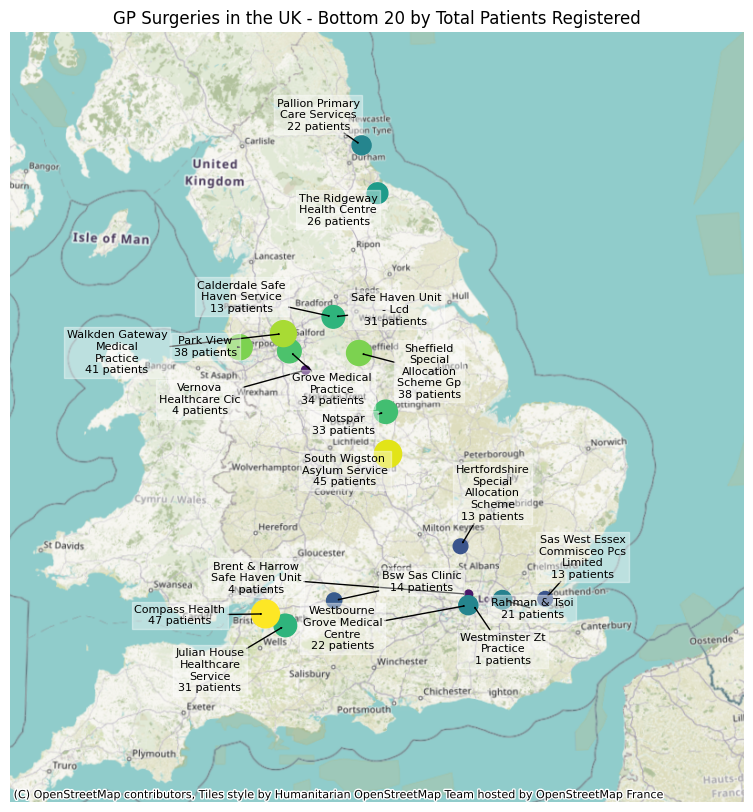

In [131]:
import textwrap

gp_surgery_locations_bottom_20 = (
    gp_surgery_locations_gdf
    .sort_values('NUMBER_OF_PATIENTS',ascending=True)
    .head(20)
)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(10, 400))
gp_surgery_locations_bottom_20[['marker_size']] = (
    min_max_scaler
    .fit_transform(gp_surgery_locations_bottom_20[["NUMBER_OF_PATIENTS"]])
)

fig, ax = plt.subplots(figsize=(20, 10))

gp_surgery_locations_bottom_20.plot(
    "NUMBER_OF_PATIENTS",
    legend=False,
    figsize=(15, 10), # Set the figure size
    markersize="marker_size",
    ax=ax
    )

ax.set_ylim([20000, 650000])
ax.set_xlim([150000, 750000])

cx.add_basemap(ax, crs=gp_surgery_locations_gdf.crs.to_string(), zoom=7)

# Find a way to remove the axis labels. You might want to use google for this!
# There are a few different ways you can go about it.
ax.axis('off')

# Add a title
plt.title("GP Surgeries in the UK - Bottom 20 by Total Patients Registered")

# Add labels

texts = [ax.text(
    x = gp_surgery_locations_bottom_20.iloc[i].geometry.centroid.coords[0][0], 
    y= gp_surgery_locations_bottom_20.iloc[i].geometry.centroid.coords[0][1],
    s=f"{textwrap.fill(gp_surgery_locations_bottom_20['name'].iloc[i].title(), 15)}\n{gp_surgery_locations_bottom_20['NUMBER_OF_PATIENTS'].iloc[i]:,} patients", 
    ha='center',
    fontsize=8,
    bbox=dict(facecolor='white', edgecolor='white', pad=2, alpha=0.4)
    ) 
            for i in range(len(gp_surgery_locations_bottom_20))]


adjust_text(texts, 
    arrowprops=dict(arrowstyle="->", color='black', lw=1), 
    ax=ax, time_lim=3, force_text=(0.7, 0.5)
    )

## Bonus exercise 3:

Instead of just looking at the total number of patients registered, let's just look at the surgeries with the biggest gender imbalance.

Create a similar map to the one above, but go back to **gp_surgery_pop_all_ages** and 

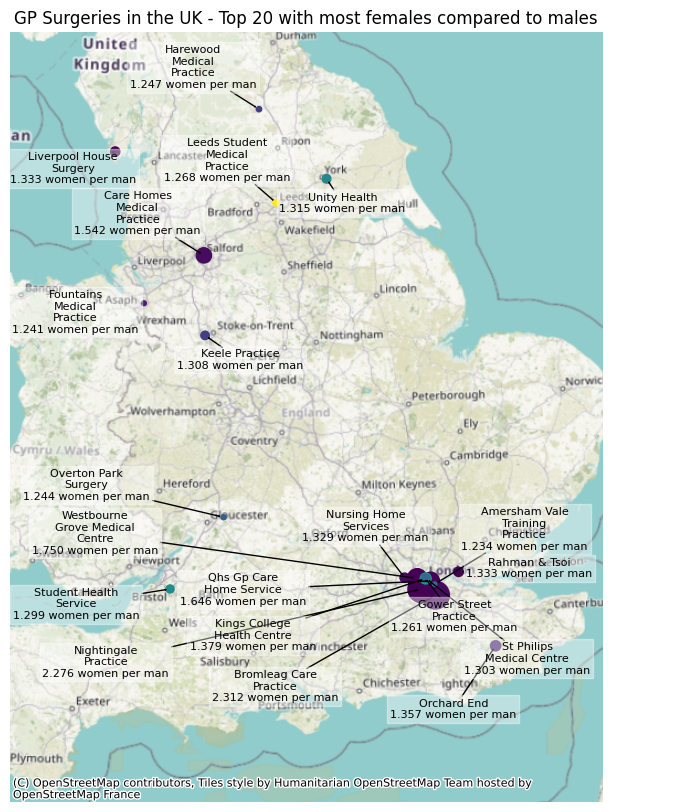

In [133]:
gp_surgery_pop_gender = gp_surgery_pop_all_ages.groupby(['ORG_CODE', 'SEX'])['NUMBER_OF_PATIENTS'].sum().reset_index(drop=False)

gp_surgery_pop_gender = gp_surgery_pop_gender.pivot(columns='SEX', values='NUMBER_OF_PATIENTS', index='ORG_CODE').reset_index()

gp_surgery_pop_gender['RATIO'] = gp_surgery_pop_gender['FEMALE']/gp_surgery_pop_gender['MALE']

# Positive ratio is more females than males
gp_surgery_locations_gdf_joined = gp_surgery_locations_gdf.merge(
    gp_surgery_pop_gender, 
    left_on="gp_code", 
    right_on="ORG_CODE"
    )

gp_surgery_locations_filtered = (
    gp_surgery_locations_gdf_joined
    .sort_values('RATIO',ascending=False)
    .head(20)
)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(10, 400))
gp_surgery_locations_filtered[['marker_size']] = (
    min_max_scaler
    .fit_transform(gp_surgery_locations_filtered[["RATIO"]])
)

fig, ax = plt.subplots(figsize=(20, 10))

gp_surgery_locations_filtered.plot(
    "NUMBER_OF_PATIENTS",
    legend=False,
    figsize=(15, 10), # Set the figure size
    markersize="marker_size",
    ax=ax
    )

ax.set_ylim([30000, 550000])
ax.set_xlim([250000, 650000])

cx.add_basemap(ax, crs=gp_surgery_locations_filtered.crs.to_string(), zoom=7)

# Find a way to remove the axis labels. You might want to use google for this!
# There are a few different ways you can go about it.
ax.axis('off')

# Add a title
plt.title("GP Surgeries in the UK - Top 20 with most females compared to males")

# Add labels

texts = [ax.text(
    x = gp_surgery_locations_filtered.iloc[i].geometry.centroid.coords[0][0], 
    y= gp_surgery_locations_filtered.iloc[i].geometry.centroid.coords[0][1],
    s=f"{textwrap.fill(gp_surgery_locations_filtered['name'].iloc[i].title(), 15)}\n{gp_surgery_locations_filtered['RATIO'].iloc[i]:.3f} women per man", 
    ha='center',
    fontsize=8,
    bbox=dict(facecolor='white', edgecolor='white', pad=2, alpha=0.4)
    ) 
            for i in range(len(gp_surgery_locations_filtered))]


adjust_text(texts, 
    arrowprops=dict(arrowstyle="->", color='black', lw=1), 
    ax=ax, time_lim=3, force_text=(0.7, 0.5)
    )

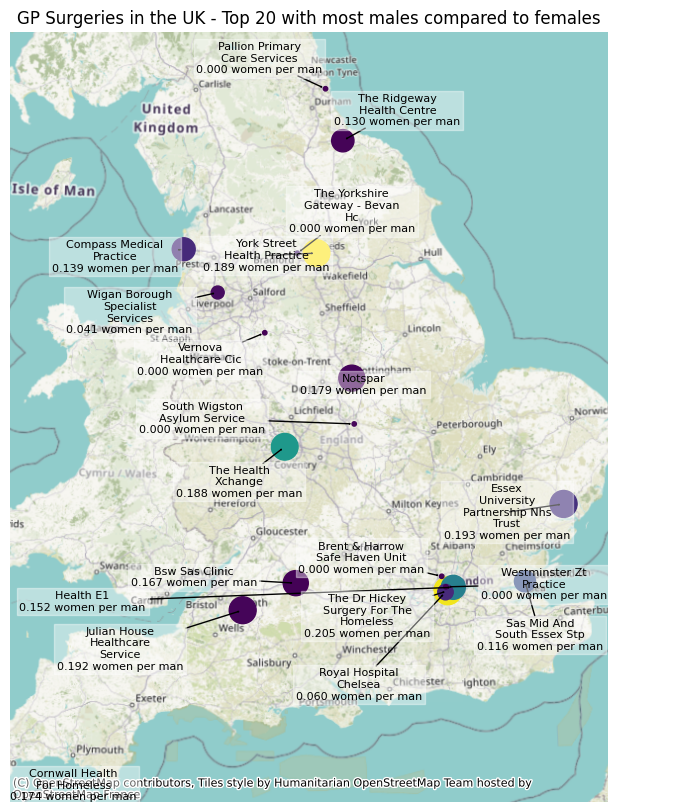

In [135]:
gp_surgery_pop_gender = gp_surgery_pop_all_ages.groupby(['ORG_CODE', 'SEX'])['NUMBER_OF_PATIENTS'].sum().reset_index(drop=False)

gp_surgery_pop_gender = gp_surgery_pop_gender.pivot(columns='SEX', values='NUMBER_OF_PATIENTS', index='ORG_CODE').reset_index()

gp_surgery_pop_gender['RATIO'] = gp_surgery_pop_gender['FEMALE']/gp_surgery_pop_gender['MALE']

# Positive ratio is more females than males
gp_surgery_locations_gdf_joined = gp_surgery_locations_gdf.merge(
    gp_surgery_pop_gender, 
    left_on="gp_code", 
    right_on="ORG_CODE"
    )

gp_surgery_locations_filtered = (
    gp_surgery_locations_gdf_joined
    .sort_values('RATIO',ascending=False)
    .tail(20)
)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(10, 400))
gp_surgery_locations_filtered[['marker_size']] = (
    min_max_scaler
    .fit_transform(gp_surgery_locations_filtered[["RATIO"]])
)

fig, ax = plt.subplots(figsize=(20, 10))

gp_surgery_locations_filtered.plot(
    "NUMBER_OF_PATIENTS",
    legend=False,
    figsize=(15, 10), # Set the figure size
    markersize="marker_size",
    ax=ax
    )

ax.set_ylim([20000, 600000])
ax.set_xlim([200000, 650000])

cx.add_basemap(ax, crs=gp_surgery_locations_filtered.crs.to_string(), zoom=7)

# Find a way to remove the axis labels. You might want to use google for this!
# There are a few different ways you can go about it.
ax.axis('off')

# Add a title
plt.title("GP Surgeries in the UK - Top 20 with most males compared to females")

# Add labels

texts = [ax.text(
    x = gp_surgery_locations_filtered.iloc[i].geometry.centroid.coords[0][0], 
    y= gp_surgery_locations_filtered.iloc[i].geometry.centroid.coords[0][1],
    s=f"{textwrap.fill(gp_surgery_locations_filtered['name'].iloc[i].title(), 15)}\n{gp_surgery_locations_filtered['RATIO'].iloc[i]:.3f} women per man", 
    ha='center',
    fontsize=8,
    bbox=dict(facecolor='white', edgecolor='white', pad=2, alpha=0.4)
    ) 
            for i in range(len(gp_surgery_locations_filtered))]


adjust_text(texts, 
    arrowprops=dict(arrowstyle="->", color='black', lw=1), 
    ax=ax, time_lim=3, force_text=(0.7, 0.5)
    )

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6c661ea7-9b58-4649-92ed-c2a834b4f69c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>